## Word2Vector

Word2Vec 是一种将词语转化为向量的技术，通过神经网络捕捉词与词之间的语义关系。它有两种架构：

    -CBOW：用上下文词预测目标词，适合小数据集。
    -Skip-gram：用目标词预测上下文词，适合大规模数据。

Word2Vec 能生成能捕捉语义的低维向量，广泛应用于文本分类、聚类和信息检索等自然语言处理任务。

### Architecture

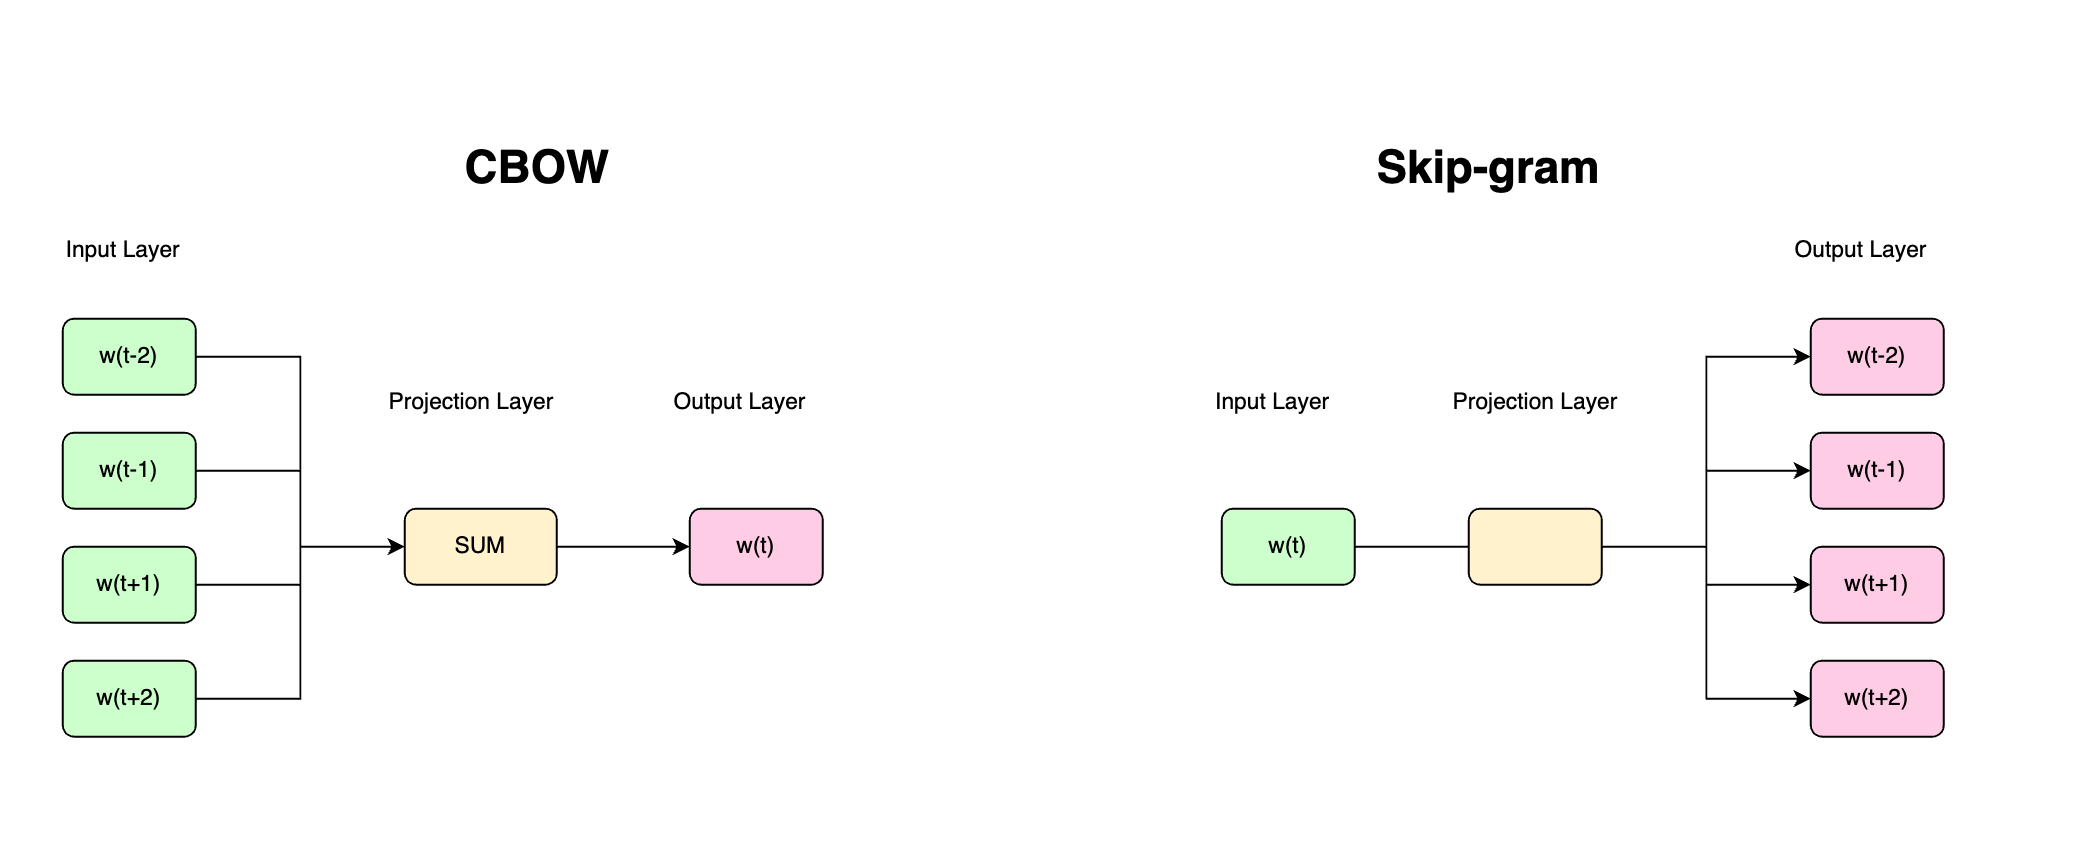

## Data Preparing

### 中文维基百科  `zhwiki-latest-pages-articles.xml.bz2` 

- **是什么**：这是中文维基百科的完整条目文本数据的压缩文件，包含最新的中文维基百科文章，但不包括历史版本、讨论页和用户页等非条目内容。
- **内容**：中文维基百科的所有条目文本，适合用于语言处理和文本分析任务。
- **格式**：XML格式存储，经过 `.bz2` 压缩。
- **用途**：
  - **自然语言处理（NLP）**：适合作为中文语料库，用于训练 Word2Vec、BERT 等模型。
  - **数据分析**：可以用来做文本分类、分词、主题建模、情感分析等任务。
  - **机器翻译**：可用于训练中文机器翻译模型。
- **下载地址**：[维基媒体数据库下载页面](https://dumps.wikimedia.org/zhwiki/latest/zhwiki-latest-pages-articles.xml.bz2)

## Implemetation

### Import Library

In [7]:
import os.path
import sys
import multiprocessing
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

### Data Preprocess

In [6]:
if __name__ == '__main__':
    base_name = "/Users/dengkai/workspace/machine-learning/NLP/data_set/nlp/wrod2vec/"
    file_name = "zhwiki-latest-pages-articles.xml.bz2"
    input_file = base_name + file_name
    output_file = base_name + "wiki.zh.text"
    
    if len(sys.argv) < 3:
        sys.exit(1)
    
    space = " "
    i = 0
    
    output = open(output_file, 'w', encoding='utf-8')
    
    wiki = WikiCorpus(input_file,dictionary={})
    
    for text in wiki.get_texts():
        output.write(space.join(text) + "\n")
        i += 1
    
    output.close()
    print(f"Finished saving {i} articles")

/Users/dengkai/tensorflow/lib/python3.11/site-packages/gensim/utils.py:1332: UserWarning: detected OSX with python3.8+; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


Finished saving 338005 articles


### Training Data

In [10]:
text_input = output_file
model_save_path = base_name + "wiki.zh.text.model"
word_vector_save_path = base_name + "wiki.zh.text.vector"

model = Word2Vec(LineSentence(text_input),
                vector_size = 400,
                window = 5,
                min_count = 5,
                workers = multiprocessing.cpu_count())

model.save(model_save_path)
model.wv.save_word2vec_format(word_vector_save_path, binary=False)

### Test

In [15]:
similar_results = model.wv.most_similar(u"高尔夫")
for ele in similar_results:
    print(ele[0], ele[1])

网球 0.9196704626083374
篮球 0.9054538011550903
沙滩排球 0.904177188873291
橄榄球 0.9020078182220459
高尔夫球 0.8778271675109863
垒球 0.8768249750137329
拳击 0.8719049692153931
自行车 0.8716062307357788
曲棍球 0.8701692819595337
射击 0.8685171604156494
